#                                CHAP 4

## I watched the video posted here https://www.bilibili.com/video/av33101528/?p=2 it was perfect. Thus some of my codes will be concerning this video.

## this is the perception method demo.

(100, 2)


<IPython.core.display.Javascript object>


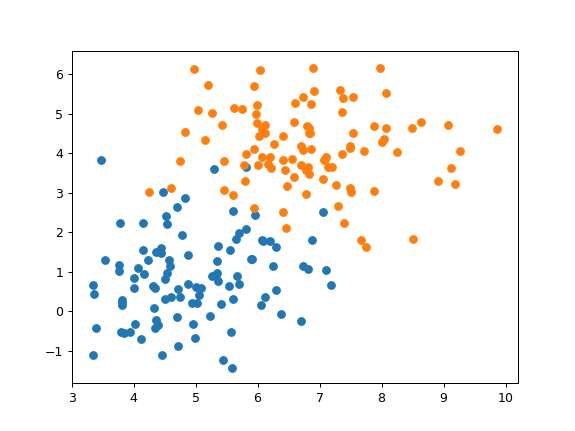

(100, 2)
[[ 3.77662215  2.23809377  1.        ]
 [ 4.49964727  0.31465121  1.        ]
 [ 7.05532024  2.50434317  1.        ]
 [ 6.04745915  0.16621226  1.        ]
 [ 6.70440094 -0.25302383  1.        ]
 [ 3.81582525  0.29468632  1.        ]
 [ 4.86985021  1.41981202  1.        ]
 [ 5.55503199  1.55019868  1.        ]
 [ 4.36176168  1.48998121  1.        ]
 [ 4.38835981 -0.34513254  1.        ]
 [ 5.04940545  0.41725341  1.        ]
 [ 3.99975136  0.84386248  1.        ]
 [ 5.60766358  0.30622828  1.        ]
 [ 5.60698143  2.52492311  1.        ]
 [ 5.58465511 -1.43790268  1.        ]
 [ 5.01719732  0.20028503  1.        ]
 [ 5.70244596  1.97326928  1.        ]
 [ 5.57443137 -0.5231356   1.        ]
 [ 4.53432197  2.21840093  1.        ]
 [ 5.81386729  3.64065617  1.        ]
 [ 6.73723158  1.13346427  1.        ]
 [ 5.2562765   0.88842324  1.        ]
 [ 3.84987839 -0.56252799  1.        ]
 [ 5.34952884  0.9790245   1.        ]
 [ 4.32327961  0.06923522  1.        ]
 [ 3.80636713  0

In [206]:
# first we generate some datas.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
mean_1 = (5, 1)
cov_1 = [[1, 0], [0, 1]]
data_1=np.random.multivariate_normal(mean_1,cov_1,(100))
print(data_1.shape)
plt.scatter(data_1[:,0],data_1[:,1])

mean_2= (7, 4)
cov_2 = [[1, 0], [0, 1]]
data_2=np.random.multivariate_normal(mean_2,cov_2,(100))
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()
ones_1=np.ones(np.shape(data_1)[0])
data_11=np.concatenate((data_1,ones_1[:,np.newaxis]),1)
ones_2=1*np.ones(np.shape(data_2)[0])
data_22=np.concatenate((data_2,ones_2[:,np.newaxis]),1)
tag=np.concatenate((1*ones_1,-1*ones_2),0)
print(data_1.shape)
data_total=np.concatenate((data_11,data_22),0)
data_total_nobias=np.concatenate((data_1,data_2),0)
print(data_total)
print(tag)

<IPython.core.display.Javascript object>


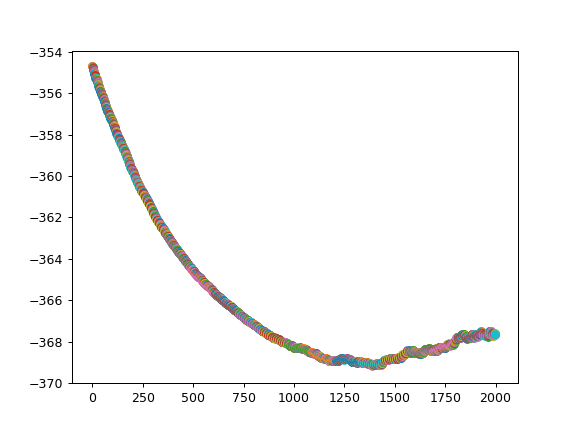

[-0.38121923 -0.91861876  0.10397822]


In [207]:
# then we set the prior value for w
w_pri=np.array([-0.62369285, -0.743176 ,   0.24227395])
lamda=0.01
beta=np.array([0.01,0.01,0.01])
loss=0
plt.figure()
for i in range(2000):
    ind=np.random.randint(0,np.shape(data_total)[0],10)
    summ=np.sum(data_total[ind,:]*tag[ind,np.newaxis],0)
    summ_norm=np.linalg.norm(summ, ord=2)
    #print(summ.shape)
    #w=w_pri+lamda*summ/summ_norm
    w=0.999*w_pri+0.001*summ/summ_norm


    #rint(np.linalg.norm(w-w_pri, ord=2))
    w=w/np.linalg.norm(w, ord=2)
    w_pri=w
    #loss=-np.sum(lamda*data_total@w_pri*tag,0)
    loss=-np.sum(data_total@w_pri*tag,0)
    #print(i,loss)
    #print(loss.shape)
    plt.scatter(i,loss)
plt.show()
print(w)

<IPython.core.display.Javascript object>


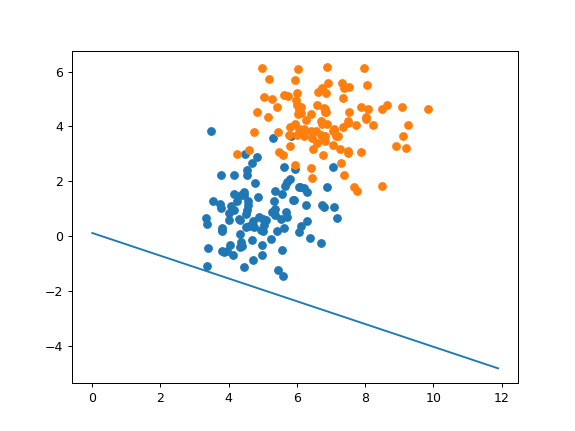

<IPython.core.display.Javascript object>


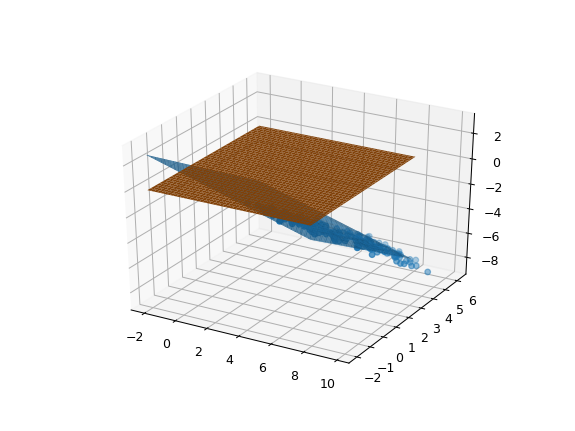

In [208]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1])


plt.scatter(data_2[:,0],data_2[:,1])
line_x=np.arange(0,12,0.1)
line_y=-w[0]/w[1]*line_x-w[2]/w[1]
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=data_total@w
ax.scatter(data_total[:,0],data_total[:,1],z)

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]+w[2]
ax.plot_surface(xx,yy,z)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()


<IPython.core.display.Javascript object>


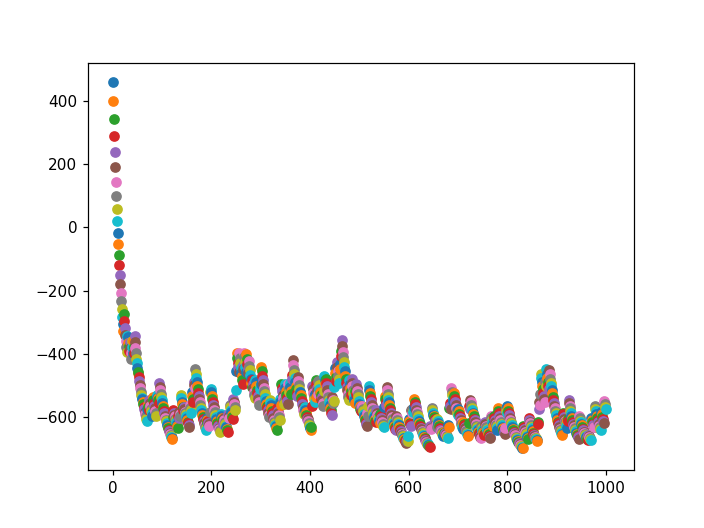

[-0.77785781 -0.1152141 ]


In [76]:
# then we set the prior value for w
w_pri=np.array([1,-1])
lamda=0.01
beta=np.array([0.01,0.01,0.01])
loss=0
plt.figure()
for i in range(1000):
    ind=np.random.randint(0,np.shape(data_total)[0],10)
    summ=np.sum(data_total_nobias[ind,:]*tag[ind,np.newaxis],0)
    summ_norm=np.linalg.norm(summ, ord=2)
    #print(summ.shape)
    #w=w_pri+lamda*summ/summ_norm
    w=0.95*w_pri+0.05*summ/summ_norm


    #rint(np.linalg.norm(w-w_pri, ord=2))
    #w=w/np.linalg.norm(w, ord=2)
    w_pri=w
    #loss=-np.sum(lamda*data_total@w_pri*tag,0)
    loss=-np.sum(data_total_nobias@w_pri*tag,0)
    #print(i,loss)
    #print(loss.shape)
    plt.scatter(i,loss)
plt.show()
print(w)

<IPython.core.display.Javascript object>


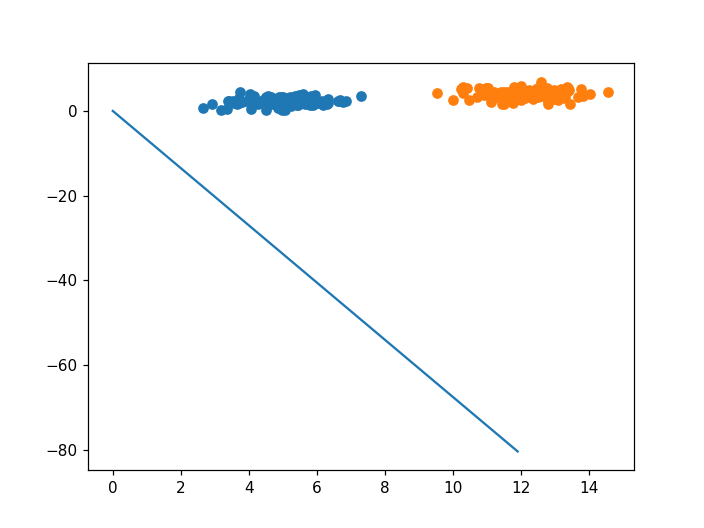

<IPython.core.display.Javascript object>


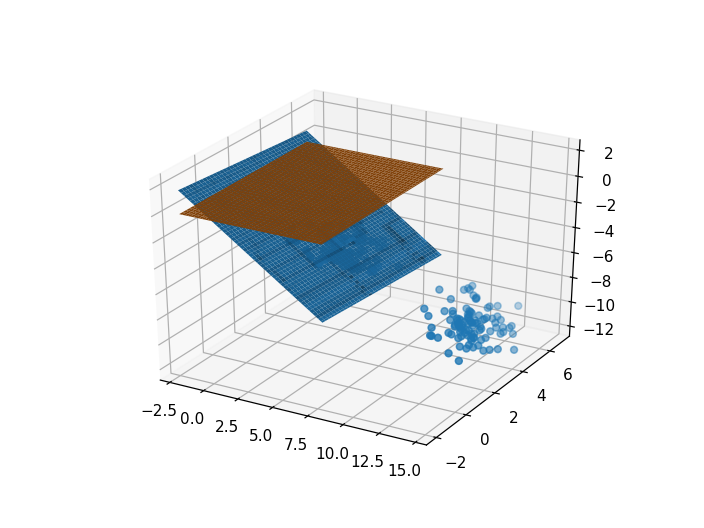

In [82]:
fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1])


plt.scatter(data_2[:,0],data_2[:,1])
line_x=np.arange(0,12,0.1)
line_y=-w[0]/w[1]*line_x
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=data_total_nobias@w
ax.scatter(data_total[:,0],data_total[:,1],z)

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]
ax.plot_surface(xx,yy,z)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()

## We calculated all the data for the loss, while actually the perception only cares the mis-estimated items.

<IPython.core.display.Javascript object>


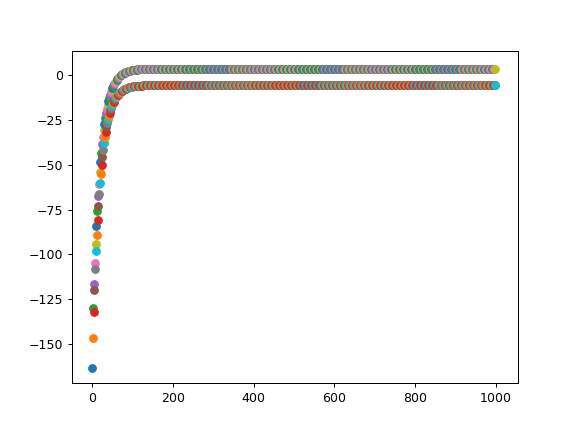

[ 1.22337785  0.50035273 -2.05532024 -1.04745915 -1.70440094  1.18417475
  0.13014979 -0.55503199  0.63823832  0.61164019 -0.04940545  1.00024864
 -0.60766358 -0.60698143 -0.58465511 -0.01719732 -0.70244596 -0.57443137
  0.46567803 -0.81386729 -1.73723158 -0.2562765   1.15012161 -0.34952884
  0.67672039  1.19363287  0.63885254  0.52825493  0.8467472   0.01328482
 -1.20293844  0.55903908  1.6475368   0.30746882 -0.90621298  0.47730251
 -0.9526972   1.05593845  0.65713035  0.68909482 -0.36258367 -1.3810384
 -0.34169871  0.43481799 -1.06836857 -1.87808267  0.11615442  0.56014103
  0.40091836  0.84936428 -1.30191359 -0.30088642  0.24953297  0.22097891
 -0.36231922 -0.88685466 -0.66655961 -1.29061016 -2.10197849  0.30814343
 -0.0102499   0.03532202 -0.53380153  1.24031552  0.83314326  0.88739
 -1.80698792  0.46934687  1.4591087  -1.08652829 -0.80979654 -0.22970976
  0.17351256  0.76796313  0.66214284  0.41989167 -0.33157446  1.19138015
  0.97620001  1.19889842 -0.70752418  1.52549655  0.543

(48,) where is wrong
[-187.96839289  -34.        ]
(2,)
[ 0.35705483  0.17611231 -0.46346424 -0.21123936 -0.37564403  0.34724396
  0.08346621 -0.08800572  0.21061922  0.20396284  0.03853115  0.30121505
 -0.10117718 -0.10100647 -0.09541913  0.04659148 -0.12489719 -0.09286057
  0.1674347  -0.15278122 -0.38386014 -0.0132399   0.3387219  -0.036577
  0.22024965  0.34961092  0.21077294  0.18309505  0.26280015  0.05421987
 -0.25014923  0.19079901  0.46320383  0.12784165 -0.17589143  0.17034382
 -0.18752446  0.31515185  0.2153471   0.22334645 -0.03984407 -0.2947201
 -0.03461745  0.15971174 -0.2164721  -0.4191092   0.07996377  0.19107478
  0.1512281   0.2634551  -0.27491851 -0.02440387  0.11334276  0.10619689
 -0.03977789 -0.17104687 -0.11591636 -0.27208974 -0.47514082  0.12801047
  0.04833013  0.05973484 -0.08269264  0.36129361  0.25939566  0.27297132
 -0.4013172   0.16835286  0.41604826 -0.22101671 -0.15176249 -0.00659137
  0.09431808  0.24308384  0.21660151  0.15597632 -0.03208378  0.3490471

[ 0.20631909  0.18671757  0.11743219  0.14475573  0.12694576  0.20525627
  0.17668121  0.15810564  0.1904557   0.18973462  0.17181339  0.20026996
  0.15667877  0.15669727  0.15730254  0.17268656  0.15410918  0.15757971
  0.18577752  0.1510885   0.1260557   0.16620503  0.20433308  0.16367692
  0.19149897  0.20551269  0.19047236  0.18747401  0.19610847  0.17351295
  0.14054062  0.18830858  0.21781821  0.1814884   0.14858497  0.18609267
  0.14732477  0.20177973  0.19096787  0.19183445  0.16332299  0.13571225
  0.16388919  0.18494089  0.14418887  0.12223717  0.17630179  0.18833845
  0.18402186  0.19617942  0.13785736  0.16499563  0.17991774  0.17914362
  0.16333016  0.14910978  0.15508208  0.1381638   0.11616726  0.18150669
  0.17287491  0.17411039  0.15868121  0.20677827  0.19573966  0.19721031
  0.12416458  0.18587698  0.21270985  0.14369655  0.15119886  0.16692526
  0.17785679  0.1939726   0.19110377  0.18453623  0.16416367  0.20545161
  0.19961799  0.20565544  0.15397151  0.21450965  0

  0.20306641  0.10830254]
(100,) where is wrong
[ 497.41062385  100.        ]
(2,)
[ 0.11988169  0.13090672  0.16987683  0.15450848  0.16452584  0.12047948
  0.13655175  0.14699972  0.12880417  0.12920975  0.13928969  0.12328407
  0.14780227  0.14779187  0.14745143  0.13879857  0.14924756  0.14729553
  0.13143545  0.15094657  0.16502646  0.14244416  0.12099874  0.14386611
  0.12821738  0.12033526  0.12879481  0.13048125  0.12562473  0.13833376
  0.15687931  0.13001184  0.11341391  0.1338479   0.1523547   0.1312582
  0.15306351  0.12243488  0.1285161   0.12802869  0.14406518  0.15959506
  0.14374672  0.13190602  0.15482732  0.16717422  0.13676516  0.12999504
  0.13242294  0.12558483  0.15838853  0.14312439  0.13473134  0.13516674
  0.14406115  0.15205951  0.14870035  0.15821617  0.17058829  0.13383762
  0.13869263  0.13799773  0.14667599  0.11962342  0.12583217  0.12500499
  0.16609014  0.13137951  0.11628715  0.15510423  0.15088449  0.14203906
  0.13589053  0.12682607  0.12843967  0.13

(100,) where is wrong
[ 497.41062385  100.        ]
(2,)
[ 0.10885522  0.12378009  0.17653495  0.15573042  0.16929118  0.10966446
  0.13142191  0.14556561  0.12093382  0.12148286  0.13512834  0.11346111
  0.14665204  0.14663796  0.1461771   0.13446349  0.14860857  0.14596606
  0.12449585  0.15090855  0.16996888  0.13939862  0.11036739  0.14132356
  0.12013946  0.10946922  0.12092114  0.12320412  0.11662972  0.13383427
  0.15893986  0.12256867  0.10009962  0.12776165  0.15281478  0.12425589
  0.15377432  0.11231154  0.12054384  0.11988402  0.14159304  0.16261625
  0.14116193  0.12513287  0.15616204  0.17287636  0.13171081  0.12254592
  0.12583264  0.1165757   0.16098293  0.14031947  0.12895757  0.12954699
  0.14158758  0.15241518  0.14786779  0.1607496   0.17749808  0.12774772
  0.13432008  0.13337937  0.14512737  0.10850558  0.11691054  0.11579076
  0.17140881  0.12442012  0.1039892   0.15653689  0.15082453  0.13885022
  0.13052681  0.118256    0.12044037  0.12544098  0.14095294  0.109

(100,) where is wrong
[ 497.41062385  100.        ]
(2,)
[ 0.10857836  0.12360115  0.17670212  0.1557611   0.16941083  0.10939291
  0.13129311  0.1455296   0.12073621  0.12128885  0.13502385  0.11321447
  0.14662316  0.14660899  0.1461451   0.13435464  0.14859252  0.14593268
  0.12432161  0.1509076   0.17009297  0.13932215  0.11010046  0.14125972
  0.11993664  0.10919639  0.12072344  0.12302141  0.11640387  0.13372129
  0.1589916   0.12238178  0.09976532  0.12760883  0.15282633  0.12408008
  0.15379216  0.11205736  0.12034367  0.11967953  0.14153097  0.1626921
  0.14109703  0.12496281  0.15619555  0.17301953  0.1315839   0.12235889
  0.12566717  0.1163495   0.16104807  0.14024904  0.1288126   0.12940589
  0.14152548  0.15242411  0.14784689  0.16081321  0.17767157  0.12759481
  0.13421029  0.13326341  0.14508848  0.10822644  0.11668653  0.11555941
  0.17154235  0.12424538  0.10368042  0.15657286  0.15082302  0.13877016
  0.13039213  0.11804082  0.12023953  0.12527294  0.14088667  0.1092

[ 0.10857371  0.12359815  0.17670493  0.15576161  0.16941284  0.10938835
  0.13129095  0.145529    0.12073289  0.1212856   0.1350221   0.11321033
  0.14662268  0.1466085   0.14614456  0.13435282  0.14859225  0.14593212
  0.12431869  0.15090758  0.17009506  0.13932087  0.11009598  0.14125865
  0.11993323  0.10919181  0.12072013  0.12301834  0.11640008  0.1337194
  0.15899247  0.12237865  0.09975971  0.12760627  0.15282652  0.12407713
  0.15379246  0.1120531   0.12034031  0.11967609  0.14152993  0.16269338
  0.14109594  0.12495996  0.15619611  0.17302194  0.13158177  0.12235575
  0.12566439  0.1163457   0.16104917  0.14024786  0.12881017  0.12940352
  0.14152443  0.15242426  0.14784654  0.16081428  0.17767448  0.12759225
  0.13420845  0.13326147  0.14508783  0.10822175  0.11668277  0.11555553
  0.17154459  0.12424245  0.10367524  0.15657347  0.15082299  0.13876882
  0.13038987  0.11803721  0.12023615  0.12527012  0.14088556  0.10923863
  0.11371006  0.1090824   0.14869778  0.1022957   0.

[ 497.41062385  100.        ]
(2,)
[ 0.10857371  0.12359814  0.17670493  0.15576161  0.16941284  0.10938835
  0.13129095  0.145529    0.12073289  0.1212856   0.1350221   0.11321033
  0.14662268  0.1466085   0.14614456  0.13435281  0.14859225  0.14593212
  0.12431868  0.15090758  0.17009506  0.13932087  0.11009597  0.14125865
  0.11993323  0.10919181  0.12072012  0.12301834  0.11640008  0.1337194
  0.15899247  0.12237864  0.09975971  0.12760626  0.15282652  0.12407713
  0.15379246  0.1120531   0.12034031  0.11967609  0.14152993  0.16269338
  0.14109594  0.12495995  0.15619611  0.17302194  0.13158177  0.12235575
  0.12566439  0.1163457   0.16104917  0.14024786  0.12881017  0.12940352
  0.14152443  0.15242426  0.14784654  0.16081428  0.17767448  0.12759225
  0.13420845  0.13326146  0.14508783  0.10822175  0.11668277  0.11555553
  0.17154459  0.12424245  0.10367523  0.15657347  0.15082299  0.13876881
  0.13038987  0.11803721  0.12023615  0.12527012  0.14088556  0.10923862
  0.11371006  0.1

[ 0.10857371  0.12359814  0.17670493  0.15576161  0.16941284  0.10938835
  0.13129095  0.145529    0.12073289  0.1212856   0.1350221   0.11321033
  0.14662268  0.1466085   0.14614456  0.13435281  0.14859225  0.14593212
  0.12431868  0.15090758  0.17009506  0.13932087  0.11009597  0.14125865
  0.11993323  0.10919181  0.12072012  0.12301834  0.11640008  0.1337194
  0.15899247  0.12237864  0.09975971  0.12760626  0.15282652  0.12407713
  0.15379246  0.1120531   0.12034031  0.11967609  0.14152993  0.16269338
  0.14109594  0.12495995  0.15619611  0.17302194  0.13158177  0.12235575
  0.12566439  0.1163457   0.16104917  0.14024786  0.12881017  0.12940352
  0.14152443  0.15242426  0.14784654  0.16081428  0.17767448  0.12759225
  0.13420845  0.13326146  0.14508783  0.10822175  0.11668277  0.11555553
  0.17154459  0.12424245  0.10367523  0.15657347  0.15082299  0.13876881
  0.13038987  0.11803721  0.12023615  0.12527012  0.14088556  0.10923862
  0.11371006  0.10908239  0.14869778  0.1022957   0.

(2,)
[-0.09095594 -0.11244823 -0.18841691 -0.15845772 -0.17798565 -0.09212127
 -0.1234527  -0.14382008 -0.10834951 -0.10914015 -0.12879007 -0.09758857
 -0.14538458 -0.1453643  -0.14470064 -0.12783267 -0.14820203 -0.14439673
 -0.11347895 -0.15151409 -0.17896156 -0.13493942 -0.09313352 -0.13771139
 -0.10720561 -0.09184012 -0.10833125 -0.11161882 -0.10215147 -0.12692657
 -0.16307943 -0.11070375 -0.0783476  -0.1181818  -0.15425911 -0.11313341
 -0.15564088 -0.09593316 -0.10778793 -0.10683777 -0.13809945 -0.16837354
 -0.13747864 -0.11439628 -0.15907927 -0.18314843 -0.12386872 -0.11067099
 -0.11540396 -0.10207368 -0.16602151 -0.13626547 -0.11990397 -0.12075276
 -0.13809159 -0.15368367 -0.14713529 -0.16568551 -0.18980385 -0.11816175
 -0.12762615 -0.1262715  -0.14318899 -0.09045246 -0.10255586 -0.10094335
 -0.1810351  -0.11336989 -0.08394872 -0.15961907 -0.15139308 -0.13414971
 -0.12216372 -0.10449337 -0.10763893 -0.11483997 -0.13717769 -0.09190708
 -0.09830342 -0.0916836  -0.14835298 -0.081975

In [211]:
w_pri=np.array([-1,5])
lamda=0.01
beta=np.array([0.01,0.01,0.01])
loss=0
plt.figure()
for i in range(1000):
    #ind=np.random.randint(0,np.shape(data_total)[0],30)

    tt=data_total[:,[0,2]]@w_pri*tag
    print(data_total[:,[0,2]]@w_pri*tag)
    ind_neg=np.where(tt<0)[0]
    print(ind_neg.shape,"where is wrong")
    
    summ=np.sum(data_total[ind_neg,:][:,[0,2]]*tag[ind_neg,np.newaxis],0)
    print(summ)
    summ_norm=np.linalg.norm(summ, ord=2)
    print(summ.shape)
    #w=w_pri+lamda*summ/summ_norm
    if ind_neg.shape[0]==0:
        break
        
    w=0.95*w_pri+0.05*summ/summ_norm


    #rint(np.linalg.norm(w-w_pri, ord=2))
    #w=w/np.linalg.norm(w, ord=2)
    w_pri=w
    #loss=-np.sum(lamda*data_total@w_pri*tag,0)
    loss=-np.sum(data_total[:,[0,2]]@w_pri*tag,0)
    #print(i,loss)
    #print(loss.shape)
    plt.scatter(i,loss)
plt.show()
print(w)

<IPython.core.display.Javascript object>


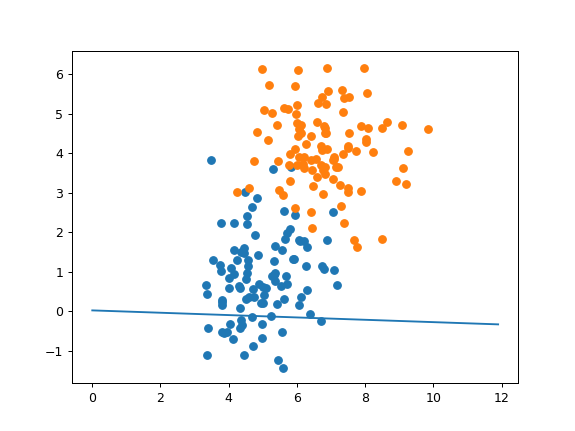

[-0.02972551  0.02130608]


<IPython.core.display.Javascript object>


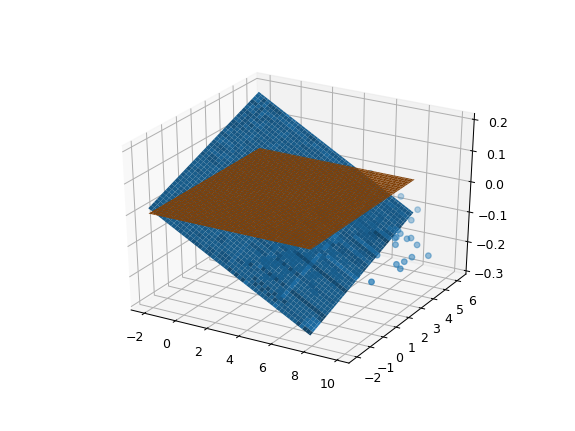

In [212]:
fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1])


plt.scatter(data_2[:,0],data_2[:,1])
line_x=np.arange(0,12,0.1)
line_y=w[0]*line_x+w[1]
print(w)
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=data_total_nobias@w
ax.scatter(data_total[:,0],data_total[:,1],z)

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]
ax.plot_surface(xx,yy,z)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()

### Thus from here, we'd know that this is one dimension problem, we can only find a value of x to segment the data, because the input is only x. we can do it within 2 dimension  

1

<IPython.core.display.Javascript object>


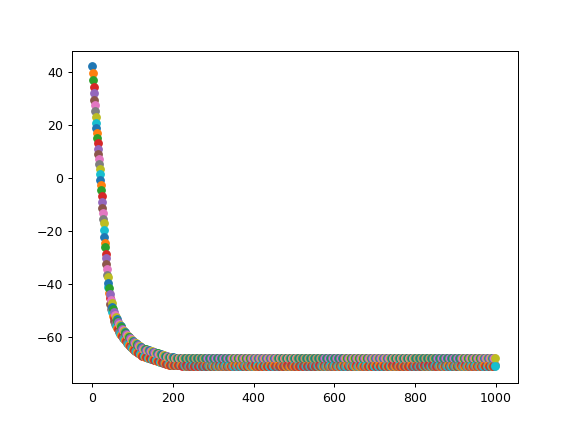

(136,) where is wrong
(135,) where is wrong
(135,) where is wrong
(134,) where is wrong
(133,) where is wrong
(132,) where is wrong
(130,) where is wrong
(130,) where is wrong
(130,) where is wrong
(129,) where is wrong
(126,) where is wrong
(126,) where is wrong
(125,) where is wrong
(125,) where is wrong
(122,) where is wrong
(117,) where is wrong
(115,) where is wrong
(114,) where is wrong
(111,) where is wrong
(107,) where is wrong
(105,) where is wrong
(101,) where is wrong
(97,) where is wrong
(96,) where is wrong
(92,) where is wrong
(87,) where is wrong
(83,) where is wrong
(80,) where is wrong
(71,) where is wrong
(65,) where is wrong
(63,) where is wrong
(59,) where is wrong
(54,) where is wrong
(50,) where is wrong
(41,) where is wrong
(37,) where is wrong
(33,) where is wrong
(32,) where is wrong
(29,) where is wrong
(22,) where is wrong
(23,) where is wrong
(23,) where is wrong
(20,) where is wrong
(19,) where is wrong
(16,) where is wrong
(16,) where is wrong
(15,) where 

(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wr

(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(6,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(12,) where is wrong
(7,) where is wrong
(11,) where is wrong
(7,) where is wrong
(12,) where is w

In [209]:
w_pri=np.array([-1 , 1 , 3])
lamda=0.01
beta=np.array([0.01,0.01,0.01])
loss=0
plt.figure()
for i in range(1000):
    #ind=np.random.randint(0,np.shape(data_total)[0],30)

    tt=data_total@w_pri*tag
    #print(data_total@w_pri*tag)
    ind_neg=np.where(tt<0)[0]
    print(ind_neg.shape,"where is wrong")
    
    summ=np.sum(data_total[ind_neg,:]*tag[ind_neg,np.newaxis],0)
   # print(summ)
    summ_norm=np.linalg.norm(summ, ord=2)
    #print(summ.shape)
    #w=w_pri+lamda*summ/summ_norm
    if ind_neg.shape[0]<1:
        break
        
    w=0.99*w_pri+0.01*summ/summ_norm


    #rint(np.linalg.norm(w-w_pri, ord=2))
    w=w/np.linalg.norm(w, ord=2)
    w_pri=w
    #loss=-np.sum(lamda*data_total@w_pri*tag,0)
    loss=-np.sum(data_total@w_pri*tag,0)
    #print(i,loss)
    #print(loss.shape)
    plt.scatter(i,loss)
plt.show()
print(w)

<IPython.core.display.Javascript object>


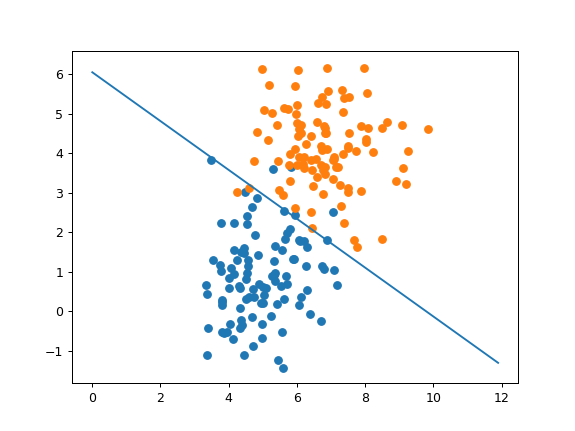

<IPython.core.display.Javascript object>


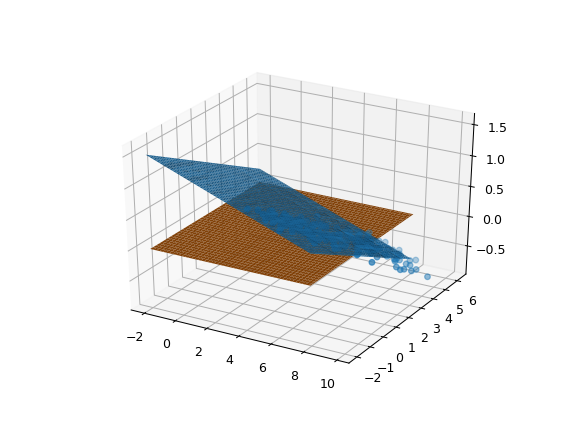

In [210]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

plt.scatter(data_1[:,0],data_1[:,1])


plt.scatter(data_2[:,0],data_2[:,1])
line_x=np.arange(0,12,0.1)
line_y=-w[0]/w[1]*line_x-w[2]/w[1]
plt.plot(line_x,line_y)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

z=data_total@w
ax.scatter(data_total[:,0],data_total[:,1],z)

surf_x=np.arange(-2,8,0.1)
surf_y=np.arange(-2,6,0.1)
xx,yy=np.meshgrid(surf_x,surf_y)

z=xx*w[0]+yy*w[1]+w[2]
ax.plot_surface(xx,yy,z)
ax.plot_surface(xx,yy,np.zeros(np.shape(xx)))
plt.show()

## you can see that, it actually works if we only choose those points where we misclassify them.